In [2]:
%matplotlib inline
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [3]:
# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

The provided code defines a Python function called "imshow," which is intended for displaying an image.

In [7]:
#transform are heavily used to do simple and complex transformation and data augmentation
transform_train = transforms.Compose(
    [
     transforms.RandomHorizontalFlip(),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose(
    [
     transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])

Demonstrated in the code provided are data transformation and augmentation techniques that are essential in the deep learning field, particularly for image datasets. The transformations are divided into two categories: "transform_train" for training data and "transform_test" for testing data. "transform_train" incorporates a combination of operations, such as random horizontal flipping, resizing images to a standard size of 224x224 pixels, converting them into tensor format, and ultimately normalizing pixel values to have a mean and standard deviation of 0.5. These transformations are beneficial in diversifying and enhancing the training data to improve the model's generalization. "transform_test" is similar to "transform_train," but without the random horizontal flipping, as test data should remain unaltered. These transformations are commonly utilized to prepare datasets for effective learning from deep learning models, ensuring that the data is in a suitable format.

In [8]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4,drop_last=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4,drop_last=True)

0.1%

58.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


The code snippet provided configures data loaders for the CIFAR-100 dataset, which is commonly used for image classification tasks, using PyTorch and torchvision. Two sets of loaders are created: "trainloader" for training data, and "testloader" for testing data. The training data loader is linked to CIFAR-100 training data and applies "transform_train" transformations. The data is loaded in batches of 128, shuffled for introducing randomness, and four workers are employed for parallel processing to expedite data loading. The last incomplete batch is dropped. Similarly, the test data loader is set up for the CIFAR-100 test dataset using "transform_test" transformations. The data is not shuffled to maintain its order. These essential data loaders ensure that data is processed systematically and uniformly during the training and evaluation processes of deep learning models.

In [9]:
dataiter = iter(trainloader)

An iterator called "dataiter" is initialized to access the CIFAR-100 training dataset in batches via the "trainloader" data loader. This method of accessing the data sequentially in batches is useful during the training of a deep learning model as it allows for easier retrieval and processing of the training data one batch at a time.

In [11]:
print(type(dataiter))

<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>


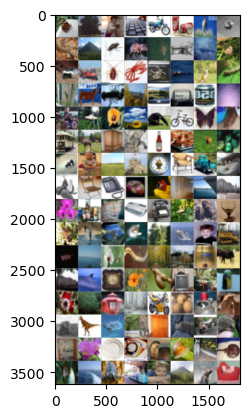

In [12]:
###Show images:
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
###

Retrieving a batch of images and their corresponding labels is done using the "next" function with the "dataiter" iterator. By using the "imshow" function, the code displays a grid of these images with their respective labels. This grid format makes it easy to inspect a batch of training data and quickly understand its content.

In [13]:
####
#Residual Network:
net = models.resnet18(pretrained=True)
net.fc = nn.Linear(512, n_classes) #changing the fully connected layer of the already allocated network
####

/home/ssarwar/.conda/envs/snn_course3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ssarwar/.conda/envs/snn_course3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ssarwar/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
52.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable


The Residual Network (ResNet) model in the provided code is initialized based on ResNet-18 architecture and pretrained using a vast image dataset. To make it suitable for a specific classification task, the fully connected layer (output layer) of the network is modified. The line "net.fc" replaces the existing fully connected layer with a customized one that can predict the required number of classes, specified as "n_classes." By doing so, the ResNet-18 model, which was pretrained on a different dataset, can be reused for a new classification task by adjusting the output layer, while still retaining the feature extraction capabilities learned from the original dataset. This is a widely used transfer learning technique in deep learning applications.

In [15]:
net = net.cuda()

In [ ]:
########TESTING PHASE###########

def test_accuracy(net, dataloader):
    #check accuracy on whole test set
    correct = 0
    total = 0
    net.eval() #important for deactivating dropout and correctly use batchnorm accumulated statistics
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print('Accuracy of the network on the test set: %d %%' % (
    accuracy))
    return accuracy

The provided code defines a function named "test_accuracy" for evaluating the accuracy of a neural network on a test dataset. It sets the network to evaluation mode using "net.eval()" to deactivate dropout and ensure that batch normalization statistics are correctly used. The function iterates through the test data using a specified data loader, calculating the accuracy by comparing the model's predictions with the ground truth labels. The final accuracy percentage is printed, and the function returns the accuracy value. This function is a crucial component in assessing how well a trained neural network performs on unseen test data, providing insights into its classification capabilities.

In [16]:
criterion = nn.CrossEntropyLoss().cuda() #it already does softmax computation for use!
optimizer = optim.Adam(net.parameters(), lr=0.0001) #better convergency w.r.t simple SGD

In this code snippet, a loss function and an optimizer are defined for training a neural network. The loss function, "nn.CrossEntropyLoss().cuda()," is set to compute the cross-entropy loss, commonly used for multi-class classification tasks, and it's placed on the GPU using ".cuda()" for faster computation. The optimizer, "optim.Adam(net.parameters(), lr=0.0001)," is configured to update the network's parameters using the Adam optimization algorithm with a learning rate of 0.0001. This combination of loss function and optimizer is essential for training the neural network, helping it learn and adjust its parameters during the training process to minimize the loss and improve its performance on the task at hand.

In [18]:
########TRAINING PHASE###########
n_loss_print = len(trainloader)  #print every epoch, use smaller numbers if you wanna print loss more often!

losses=[]
accuracy = []

n_epochs = 10
for epoch in range(n_epochs):  # loop over the dataset multiple times
    net.train() #important for activating dropout and correctly train batchnorm
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs and cast them into cuda wrapper
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % n_loss_print == (n_loss_print -1):    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / n_loss_print))
            losses.append(running_loss / n_loss_print)
            running_loss = 0.0
    accuracy.append(test_accuracy(net,testloader))

print('Finished Training')

[1,   390] loss: 2.359
Accuracy of the network on the test set: 67 %
[2,   390] loss: 0.845
Accuracy of the network on the test set: 74 %
[3,   390] loss: 0.540
Accuracy of the network on the test set: 75 %
[4,   390] loss: 0.349
Accuracy of the network on the test set: 76 %
[5,   390] loss: 0.230
Accuracy of the network on the test set: 77 %
[6,   390] loss: 0.152
Accuracy of the network on the test set: 77 %
[7,   390] loss: 0.102
Accuracy of the network on the test set: 77 %
[8,   390] loss: 0.075
Accuracy of the network on the test set: 78 %
[9,   390] loss: 0.061
Accuracy of the network on the test set: 78 %
[10,   390] loss: 0.053
Accuracy of the network on the test set: 77 %
Finished Training


This code represents a training loop for a neural network over a specified number of epochs (in this case, 10). It iterates through the training data using the "trainloader" and updates the network's parameters by backpropagating and optimizing using the Adam optimizer. The code prints the training loss at regular intervals, and the losses are stored in a list for monitoring. Additionally, the code evaluates and records the accuracy of the network on the test data after each epoch. The training loop repeats for the defined number of epochs, and once completed, the message "Finished Training" is displayed. This code structure is fundamental for training deep learning models and tracking their performance over time.

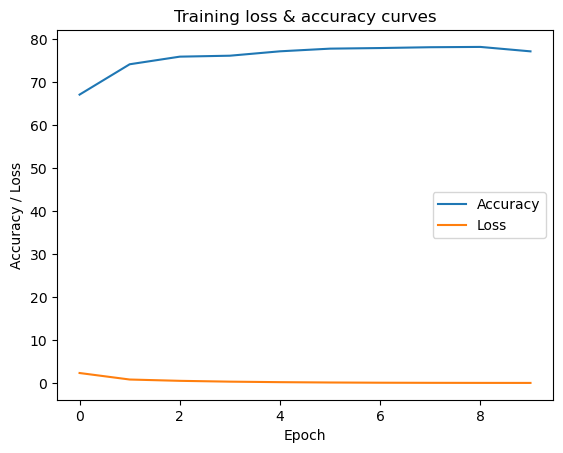

In [19]:
plt.title('Training loss & accuracy curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.plot(range(n_epochs),accuracy, label='Accuracy')
plt.plot(range(n_epochs),losses, label='Loss')
plt.legend()